In [36]:
import warnings
warnings.filterwarnings('ignore')

Header parameter names converted to lower case.
Header parameter names converted to lower case.
Header parameter names converted to lower case.


ImageView object:
  Display bands       :  (64, 55, 19)
  Interpolation       :  <default>
  RGB data limits     :
    R: [217.0, 292.0]
    G: [215.0, 282.0]
    B: [210.0, 242.0]

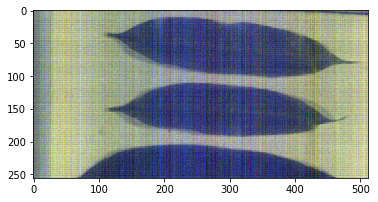

In [37]:
from spectral import imshow, view_cube
import numpy as np

import spectral.io.envi as envi
dark_ref = envi.open('matlabproc/mangga/DARK_MANGGA/capture/DARK_MANGGA.hdr', 'matlabproc/mangga/DARK_MANGGA/capture/DARK_MANGGA.raw')
white_ref = envi.open('matlabproc/mangga/WHITE_MANGGA/capture/WHITE_MANGGA.hdr', 'matlabproc/mangga/WHITE_MANGGA/capture/WHITE_MANGGA.raw')
data_ref = envi.open('matlabproc/mangga/DATA1/capture/DATA1.hdr', 'matlabproc/mangga/DATA1/capture/DATA1.raw')

#imshow(data_ref, (110, 5, 18))
dark_nparr = np.array(dark_ref.load())
white_nparr = np.array(white_ref.load())
data_nparr = np.array(data_ref.load())

imshow(data_nparr, (64, 55, 19))

ImageView object:
  Display bands       :  (64, 55, 19)
  Interpolation       :  <default>
  RGB data limits     :
    R: [-0.13333334028720856, 1.6000000238418579]
    G: [-0.20000000298023224, 1.7058823108673096]
    B: [-inf, nan]

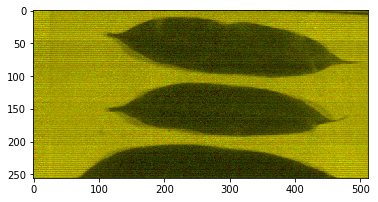

In [38]:
corrected_nparr = np.divide(
    np.subtract(data_nparr, dark_nparr), 
    np.subtract(white_nparr, dark_nparr))

imshow(corrected_nparr, (64, 55, 19))

ImageView object:
  Display bands       :  (64, 55, 19)
  Interpolation       :  <default>
  RGB data limits     :
    R: [-0.025641025975346565, 1.2894736528396606]
    G: [-0.09375, 1.3333333730697632]
    B: [-inf, inf]

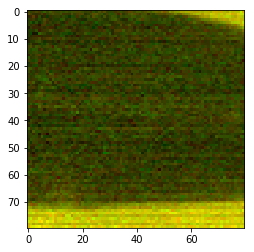

In [43]:
x = 300
y = 120
w = 80
h = 80

roi = corrected_nparr[y:y+h, x:x+w, :224]
imshow(roi, (64, 55, 19))